In [10]:
install.packages("jtools")
library(jtools)
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(lmerTest) #like lmer but with p-value
library(emmeans) #visualize interaction term
library(betareg) #beta regression: for modeling beta-distributed dependent variables, e.g., rates and proportions
library(diptest)
library(sjPlot)
#glmmTMB-package for zero-inflated generalized linear mixed models as
library(glmmTMB)

#levenetest
library(car)

library(rstanarm) #r2 in mixed effect models
library(performance) #r2 in mixed effect models

Installing package into 'C:/Users/camil/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'pander'




package 'pander' successfully unpacked and MD5 sums checked
package 'jtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\camil\AppData\Local\Temp\RtmpUpwwvl\downloaded_packages


Warning message:
"package 'jtools' was built under R version 4.0.4"


In [ ]:
TOADD: plot of estimates:
library(sjPlot)
library(sjlabelled)
library(sjmisc)
library(ggplot2)
plot_model(model_$mod, vline.color = "red")

# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/correctlightschedule_/visual/Treatment&Classs/adaptability/MVTCLUSTERING'
df = read.csv(file.path(path_,'df_daily_variables.csv'), header = TRUE, sep = ";")
df$EarlyGroup = as.factor(df$EarlyGroup) 
df$PenID = as.factor(df$PenID)
df$HenID = as.factor(df$HenID)
df$DIB = as.integer(df$DIB) #as factor as within a week its not the time taht we want to take into acount, but the event
df$factDIB = as.factor(df$DIB)
print(dim(df))
summary(df)
head(df, 3)

[1] 6429   22


 minutes.until.light.turn.off.after.first.moment.in.WG
 Min.   :  0.0                                        
 1st Qu.:  0.0                                        
 Median :  0.0                                        
 Mean   :156.8                                        
 3rd Qu.:340.3                                        
 Max.   :418.3                                        
                                                      
 minutes.until.light.turn.off.after.first.moment.in.litter
 Min.   :  0.0                                            
 1st Qu.:484.2                                            
 Median :654.1                                            
 Mean   :585.7                                            
 3rd Qu.:774.5                                            
 Max.   :900.0                                            
                                                          
 minutes.until.light.turn.off.after.first.moment.in.lowerperch
 Min.   :  0.0           

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,perc_duration_3_Zone,perc_duration_4_Zone,perc_duration_5_Zone,duration_last.firsttransition_mn,in_WG_15mnAfterOpening,HenID,PenID,DIB,EarlyGroup,factDIB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>
1,0,325.5000,480.0000,331.8833,424.0167,8.583333,18886,9,0,0,...,12.111111,1.798611,20.51389,415,0,hen_1,9,1,MVT,1
2,0,534.8167,519.5000,0.0000,540.0000,0.000000,15030,18,0,0,...,17.395062,0.000000,53.87037,284,0,hen_1,9,2,MVT,2
3,0,0.0000,365.3667,0.0000,540.0000,0.000000,21371,4,0,0,...,1.700617,0.000000,98.29938,9,0,hen_1,9,3,MVT,3


In [3]:
#initialise the name of the run to save inforamtion for Mike
name='FirstModel'

# Mixed effect models

# perc_duration_5_Zone

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,duration_last.firsttransition_mn,in_WG_15mnAfterOpening,HenID,PenID,DIB,EarlyGroup,factDIB,sqrtperc_duration_5_Zone,logperc_duration_5_Zone,hoDIB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,885,0,hen_99,11,52,MVT,52,6.946355,3.896947,2704
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,851,0,hen_99,11,53,MVT,53,6.966587,3.902646,2809
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,883,0,hen_99,11,54,MVT,54,6.710136,3.829205,2916


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: perc_duration_5_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1 |  
    PenID/HenID)
   Data: df

REML criterion at convergence: 59176.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9521 -0.6509 -0.0587  0.6312  3.1034 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 324.90   18.025  
 PenID       (Intercept)  21.57    4.644  
 Residual                542.45   23.291  
Number of obs: 6429, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          43.22263    2.69077   12.50547   16.06 1.01e-09 ***
DIB                  -0.29238    0.02395 6295.46826  -12.21  < 2e-16 ***
EarlyGroupNMVT       36.21175    3.56340  160.80348   10.16  < 2e-16 ***
DIB:EarlyGroupNMVT   -0.59941    0.03979 6295.54667  -15.06  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,15.8560495,20.5287923
.sig02,0.0000000,9.9411942
.sigma,22.8859931,23.6995468
(Intercept),37.9399499,48.7303178
DIB,-0.3393098,-0.2454342
EarlyGroupNMVT,29.2890200,43.5477991
DIB:EarlyGroupNMVT,-0.6773918,-0.5214236


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-29588.27,59190.55,NA,NA,NA
(1 | HenID:PenID),6,-30808.64,61629.28,2440.731668,1,0.0000000
(1 | PenID),6,-29589.28,59190.56,2.015756,1,0.1556737


png 
  2

png 
  2

png 
  2

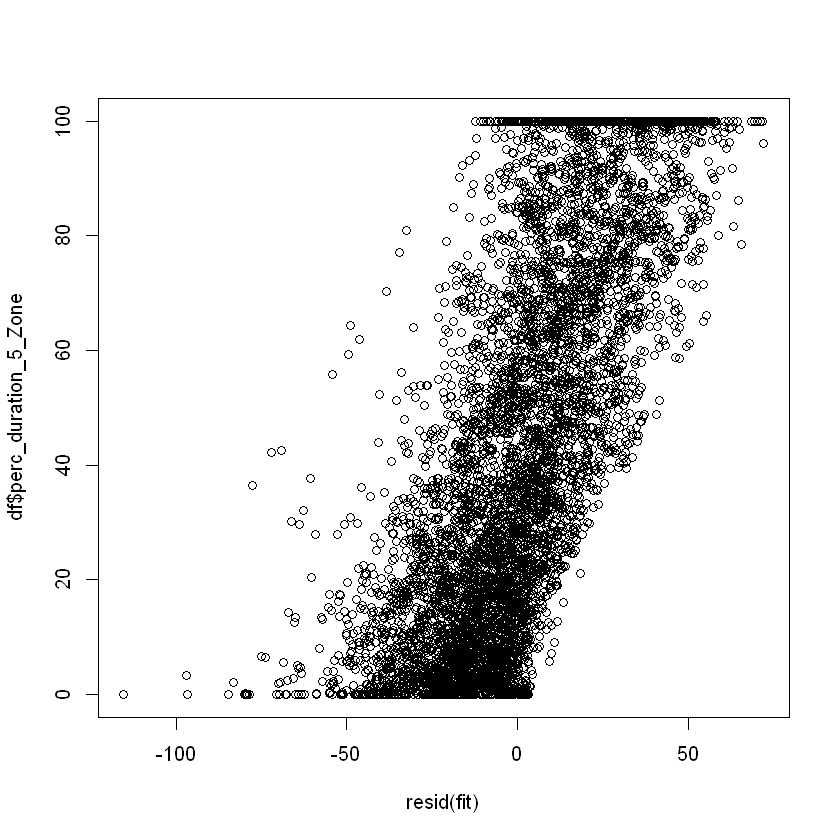

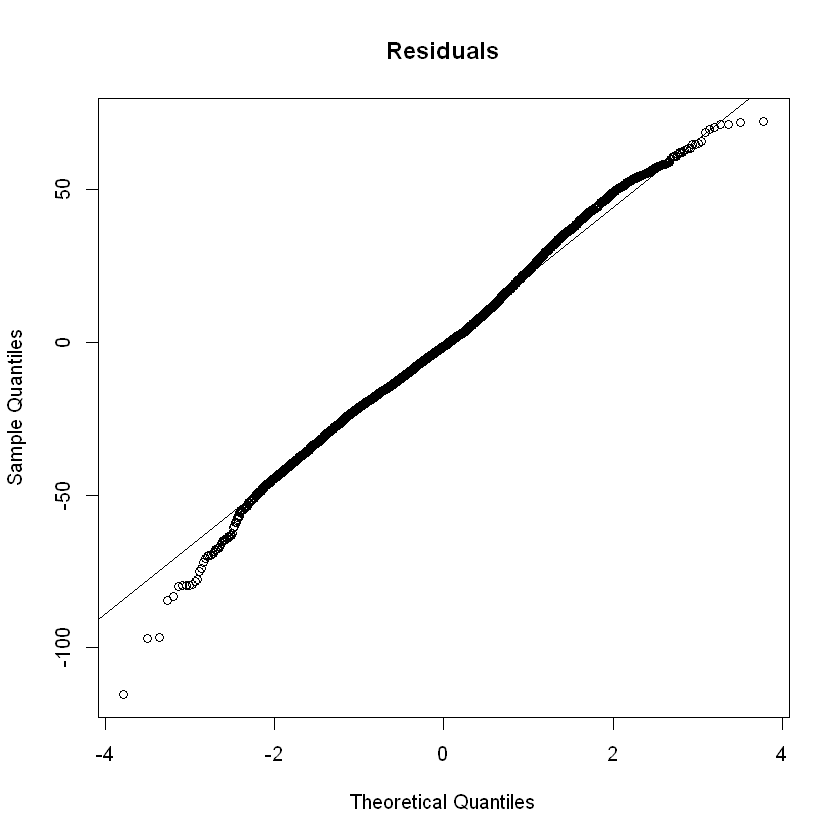

$`HenID:PenID`

$PenID


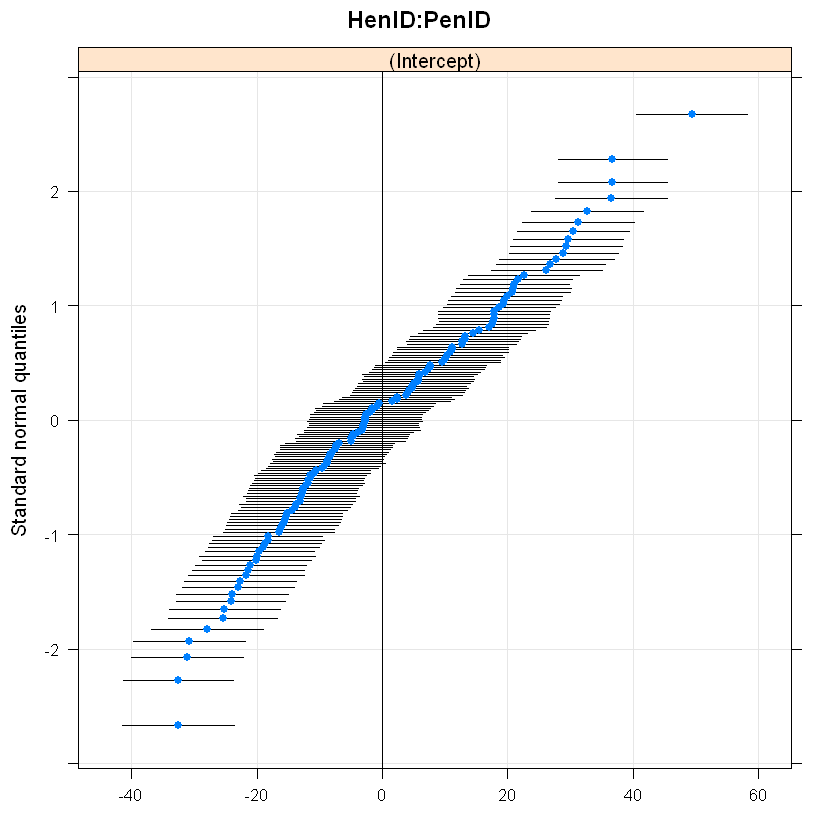

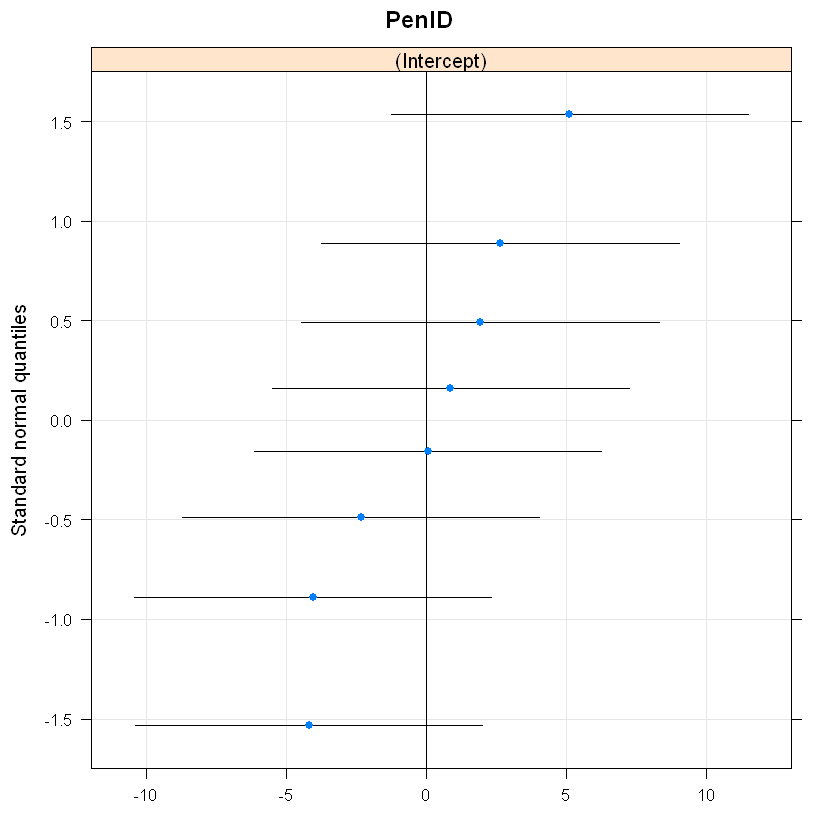

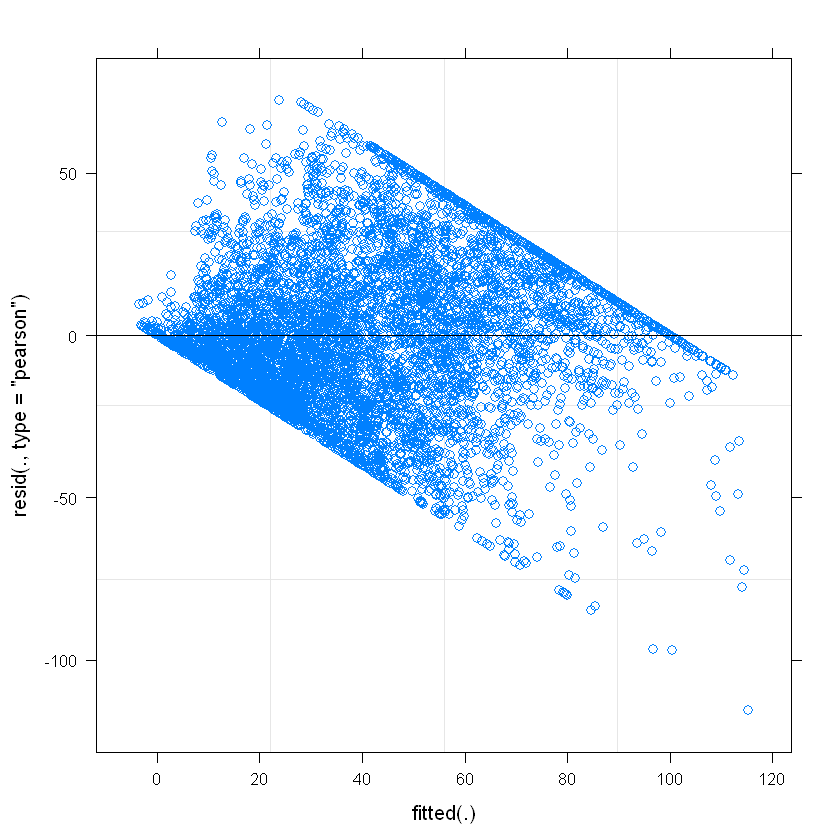

png 
  2

png 
  2

png 
  2

png 
  2

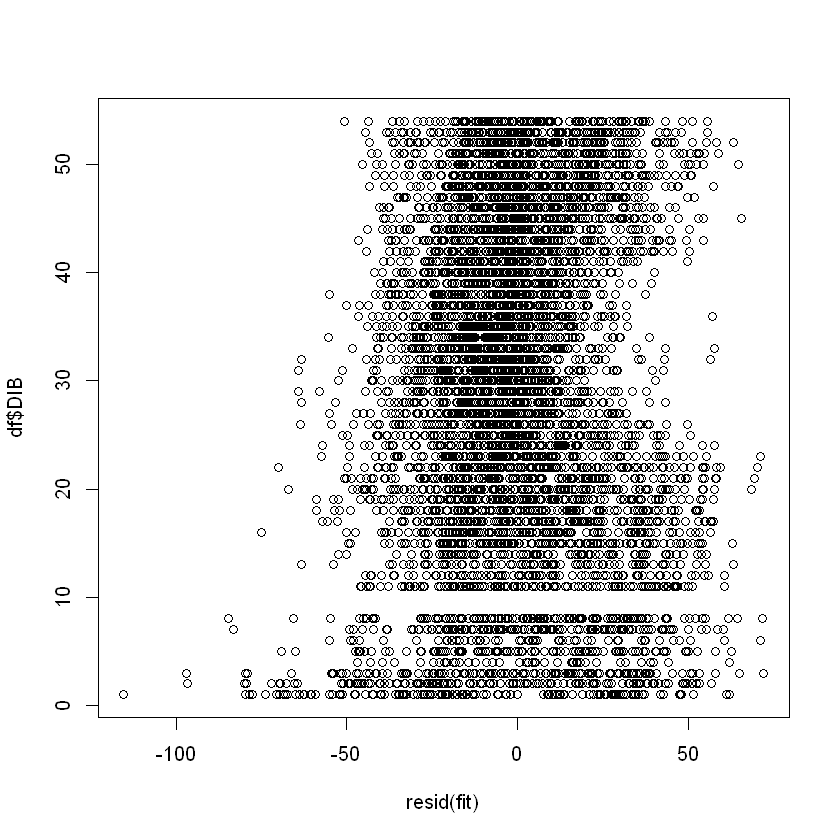

In [4]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','perc_duration_5_Zone')
sink(file.path(path__,paste(name,'.txt', sep='')))

#modeling
df$sqrtperc_duration_5_Zone = sqrt(df$perc_duration_5_Zone)
df$logperc_duration_5_Zone = log(df$perc_duration_5_Zone+1)
df$hoDIB = df$DIB**2
tail(df,3)
fit = lmerTest::lmer(perc_duration_5_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity',name,'.jpg', sep='')))
plot(resid(fit),df$perc_duration_5_Zone)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

#################visualise plot
plot(resid(fit),df$perc_duration_5_Zone)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df$DIB)

#################saving plot
###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df$DIB)
dev.off()

Confidence intervals for merMod models is an experimental feature. The
intervals reflect only the variance of the fixed effects, not the random
effects.



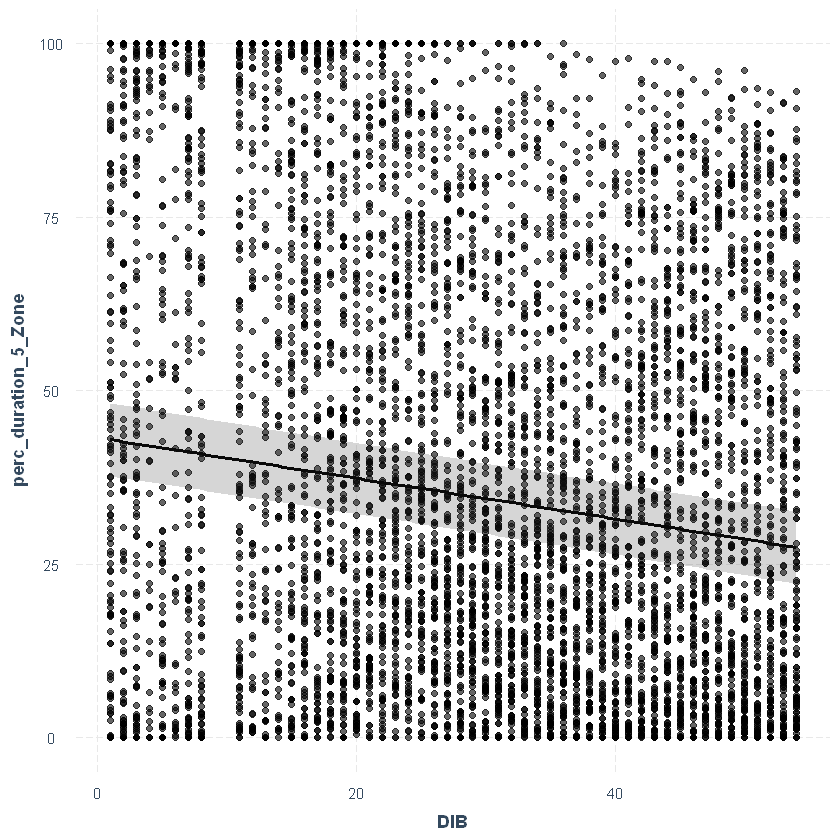

In [14]:
#Plotting predicted data from models to aid in substantive interpretation and 
#understanding model fit, including models with interactions
effect_plot(fit, pred = DIB, interval = TRUE, plot.points = TRUE)

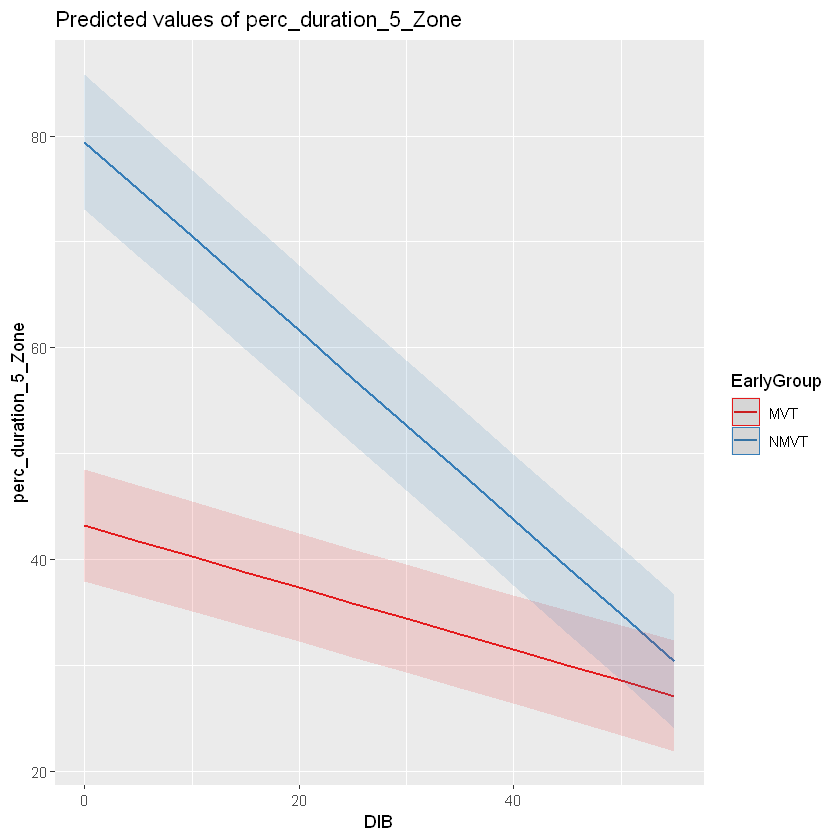

In [15]:
#marginal effecct. TO READ 
#https://cran.r-project.org/web/packages/sjPlot/vignettes/plot_interactions.html 
#and verify if apply to these models
#plot_model(fit, type = "pred", terms = c("DIB", "EarlyGroup"))
#more general but exact same output in this case:
plot_model(fit, type = "int")

# perc_duration_4_Zone

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,in_WG_15mnAfterOpening,HenID,PenID,DIB,EarlyGroup,sqrtperc_duration_5_Zone,logperc_duration_5_Zone,hoDIB,sqrtperc_duration_4_Zone,logperc_duration_4_Zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,0,hen_99,11,52,MVT,6.946355,3.896947,2704,2.752776,2.149175
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,0,hen_99,11,53,MVT,6.966587,3.902646,2809,2.189622,1.756900
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,0,hen_99,11,54,MVT,6.710136,3.829205,2916,2.214013,1.775266


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logperc_duration_4_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup +  
    (1 | PenID/HenID)
   Data: df

REML criterion at convergence: 15539.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4438 -0.6103  0.0286  0.6127  4.9404 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 0.153591 0.39191 
 PenID       (Intercept) 0.005753 0.07585 
 Residual                0.619789 0.78727 
Number of obs: 6429, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         1.723e+00  5.722e-02  1.860e+01  30.108  < 2e-16 ***
DIB                 6.071e-03  8.095e-04  6.296e+03   7.500 7.25e-14 ***
EarlyGroupNMVT     -7.897e-01  8.427e-02  2.107e+02  -9.371  < 2e-16 ***
DIB:EarlyGroupNMVT  1.898e-02  1.345e-03  6.296e+03  14.113  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**'

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.342417364,0.448449565
.sig02,0.000000000,0.185114310
.sigma,0.773592197,0.801091500
(Intercept),1.608984634,1.834871800
DIB,0.004485547,0.007658654
EarlyGroupNMVT,-0.957181198,-0.625893578
DIB:EarlyGroupNMVT,0.016344794,0.021616683


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-7769.969,15553.94,NA,NA,NA
(1 | HenID:PenID),6,-8286.805,16585.61,1033.6715826,1,8.617820e-227
(1 | PenID),6,-7770.366,15552.73,0.7945631,1,3.727239e-01


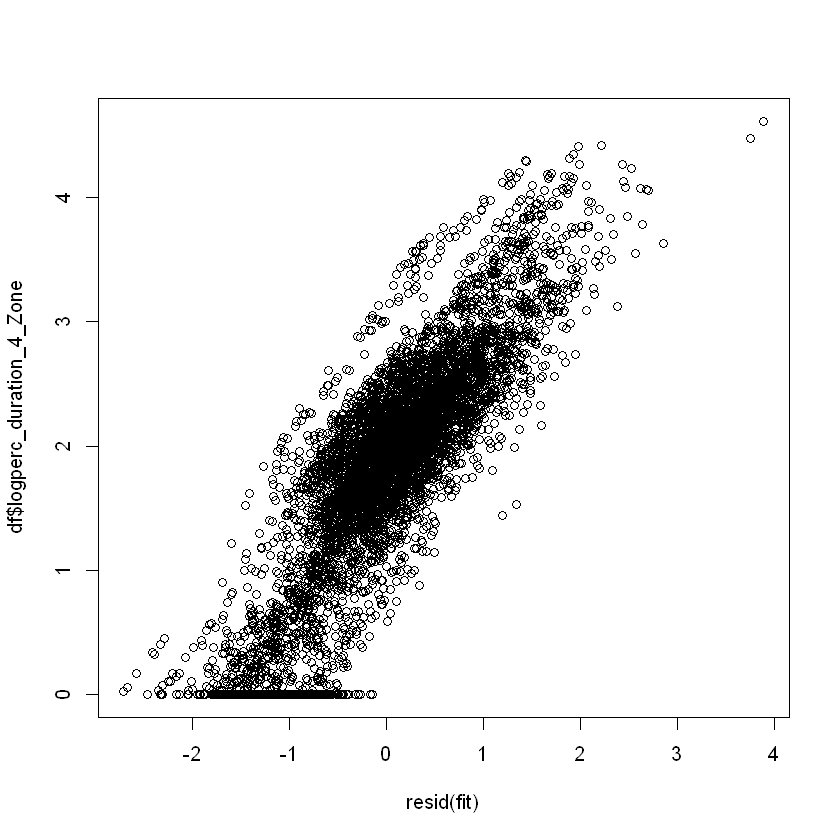

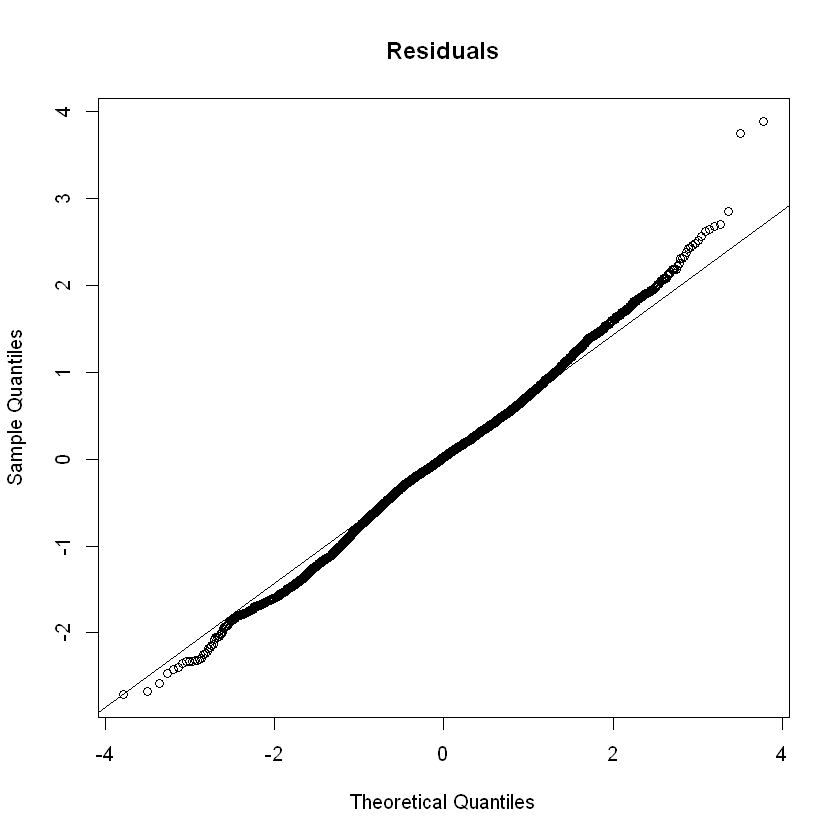

$`HenID:PenID`

$PenID


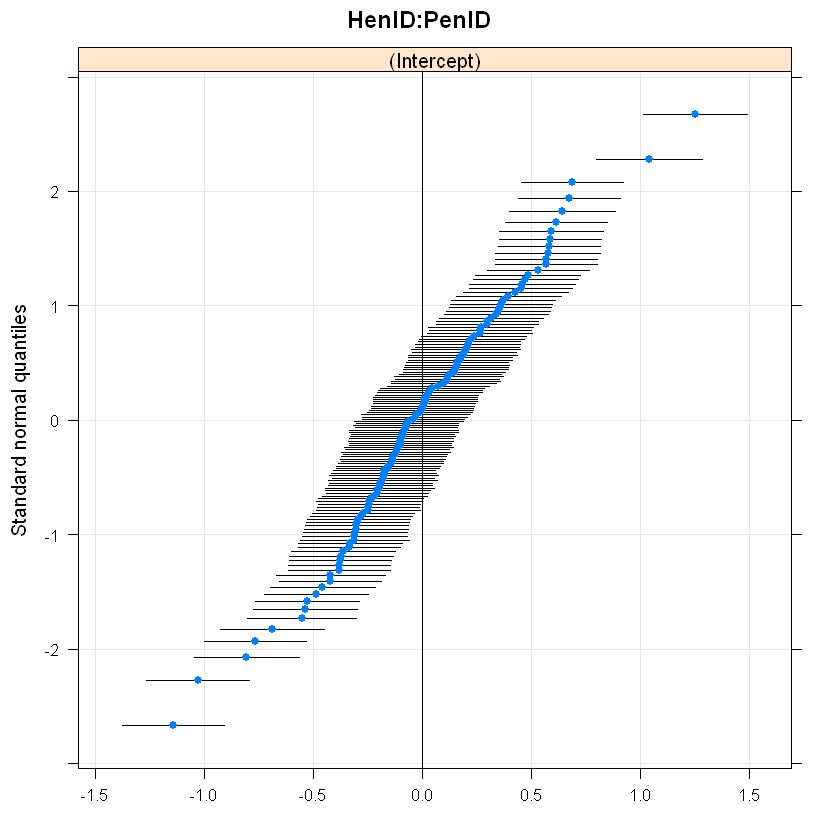

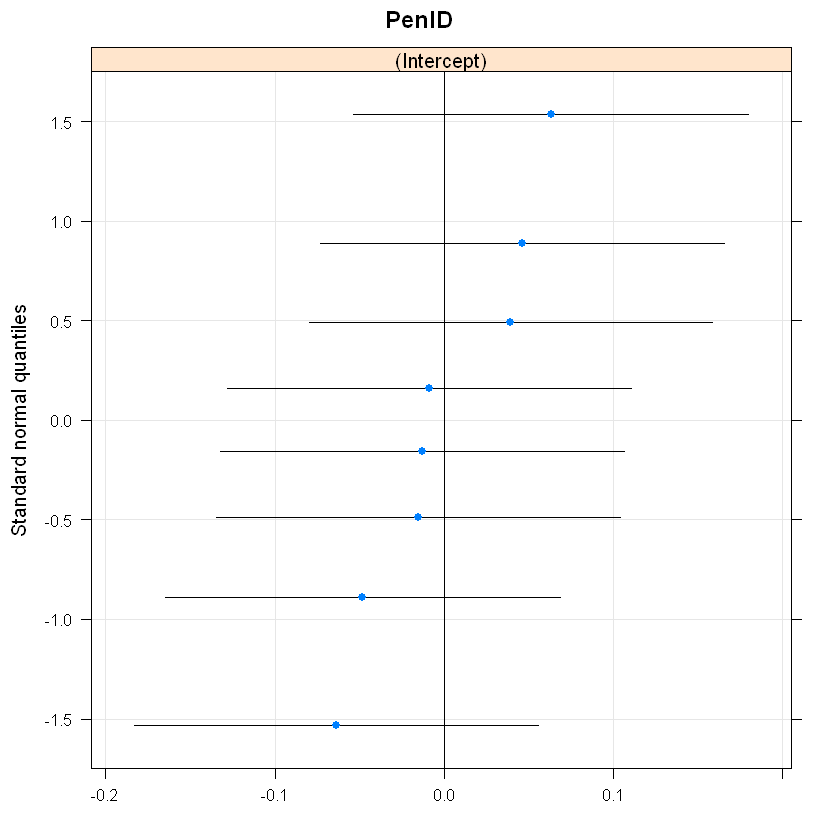

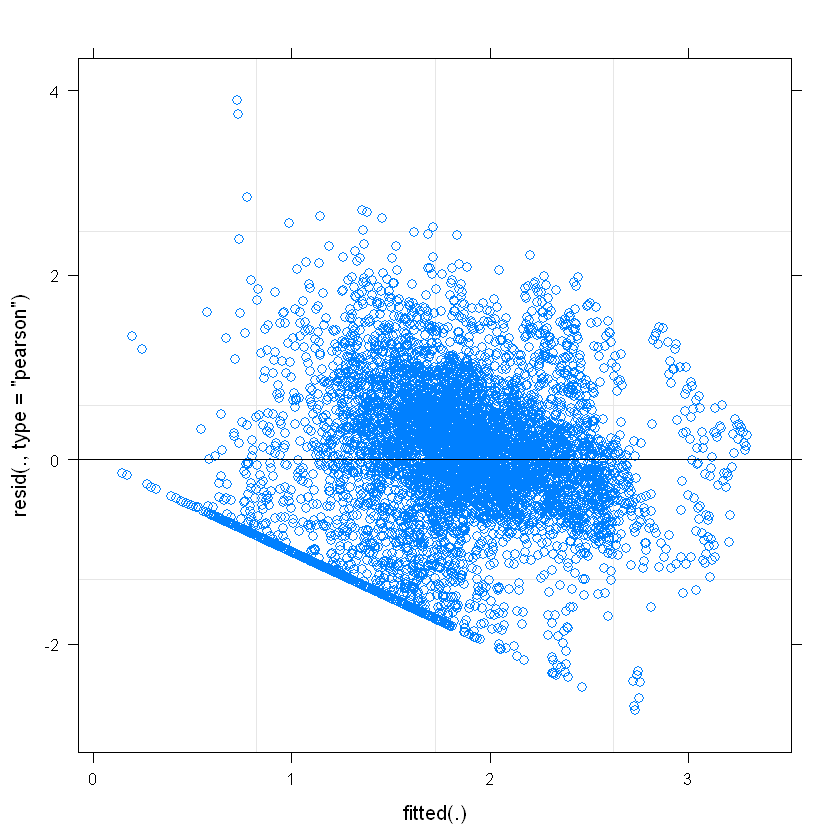

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

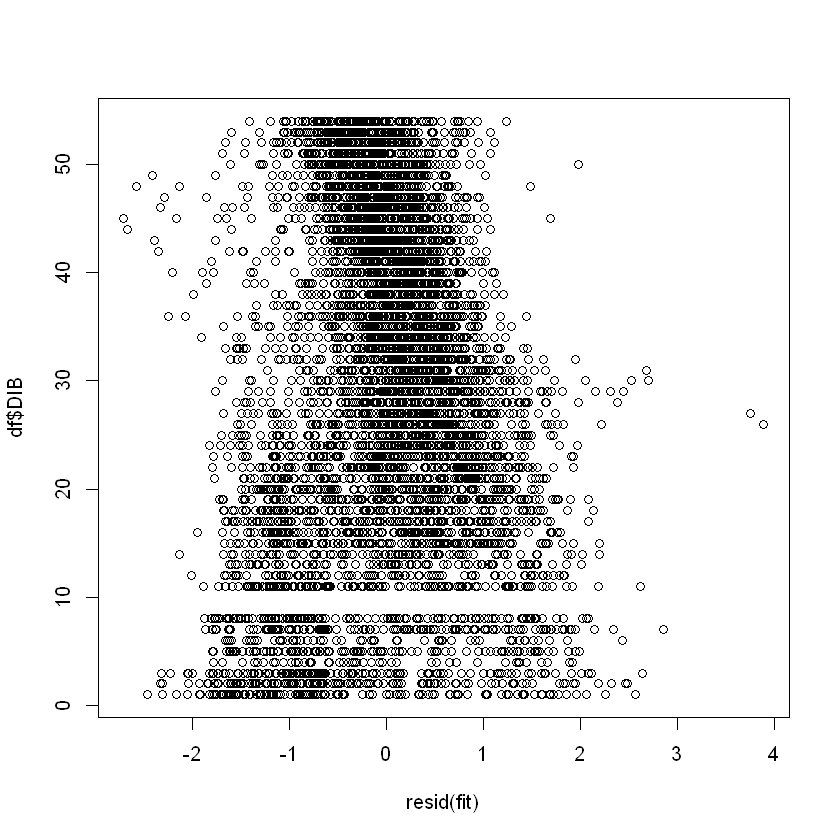

In [5]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','perc_duration_4_Zone')
sink(file.path(path__,paste(name,'.txt', sep='')))

#modeling
df$sqrtperc_duration_4_Zone = sqrt(df$perc_duration_4_Zone)
df$logperc_duration_4_Zone = log(df$perc_duration_4_Zone+1)
df$hoDIB = df$DIB**2
tail(df,3)
fit = lmerTest::lmer(logperc_duration_4_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#################visualise plot
plot(resid(fit),df$logperc_duration_4_Zone)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df$DIB)

#################saving plot
#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity',name,'.jpg', sep='')))
plot(resid(fit),df$logperc_duration_4_Zone)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df$DIB)
dev.off()

In [6]:
#tab_model(fit, p.val = "kr", show.df = TRUE)

# perc_duration_3_Zone

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,sqrtperc_duration_5_Zone,logperc_duration_5_Zone,hoDIB,sqrtperc_duration_4_Zone,logperc_duration_4_Zone,factDIB,sqrtperc_duration_3_Zone,logperc_duration_3_Zone,sqrtperc_duration_2_Zone,logperc_duration_2_Zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,6.946355,3.896947,2704,2.752776,2.149175,52,1.930745,1.553455,6.117825,3.648781
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,6.966587,3.902646,2809,2.189622,1.756900,53,1.636392,1.302309,6.606675,3.798813
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,6.710136,3.829205,2916,2.214013,1.775266,54,2.245984,1.799140,6.601066,3.797152


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrtperc_duration_3_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup +  
    (1 | PenID/HenID)
   Data: df

REML criterion at convergence: 22801.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4192 -0.6164  0.0396  0.6378  4.8629 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 1.04590  1.0227  
 PenID       (Intercept) 0.01457  0.1207  
 Residual                1.89019  1.3748  
Number of obs: 6429, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         3.061e+00  1.284e-01  1.659e+01  23.834 2.87e-14 ***
DIB                 3.212e-02  1.414e-03  6.296e+03  22.720  < 2e-16 ***
EarlyGroupNMVT     -1.785e+00  2.015e-01  1.660e+02  -8.861 1.18e-15 ***
DIB:EarlyGroupNMVT  2.768e-02  2.349e-03  6.296e+03  11.783  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.89945770,1.16205379
.sig02,0.00000000,0.40480402
.sigma,1.35095977,1.39898388
(Intercept),2.79847878,3.30989522
DIB,0.02934818,0.03488961
EarlyGroupNMVT,-2.19861155,-1.39236373
DIB:EarlyGroupNMVT,0.02307119,0.03227797


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-11400.60,22815.20,NA,NA,NA
(1 | HenID:PenID),6,-12534.29,25080.58,2267.3784567,1,0.0000000
(1 | PenID),6,-11400.67,22813.33,0.1308253,1,0.7175779


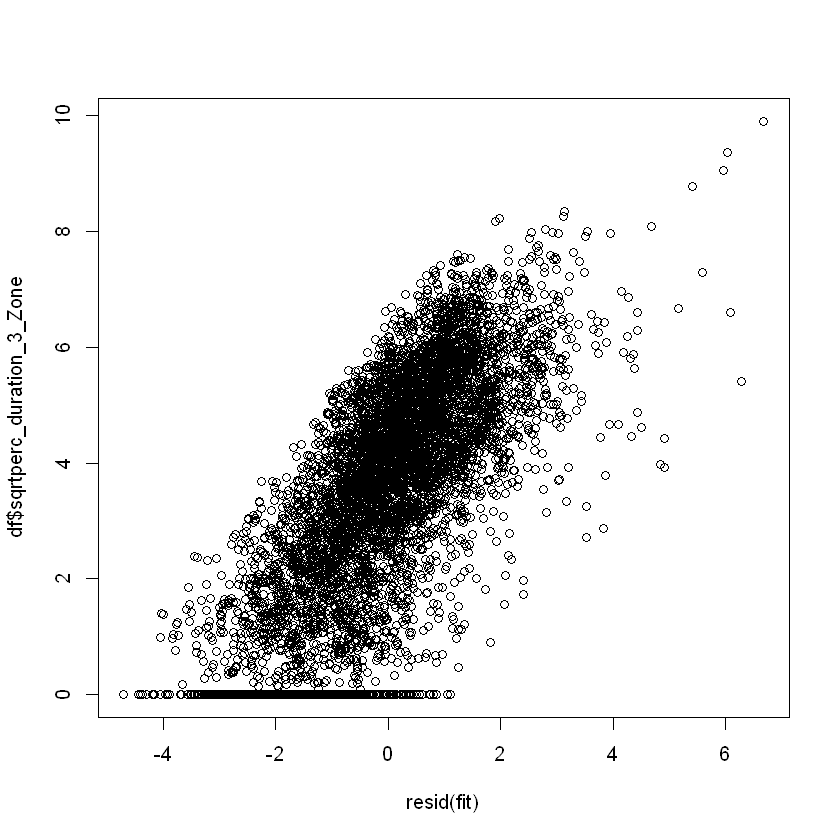

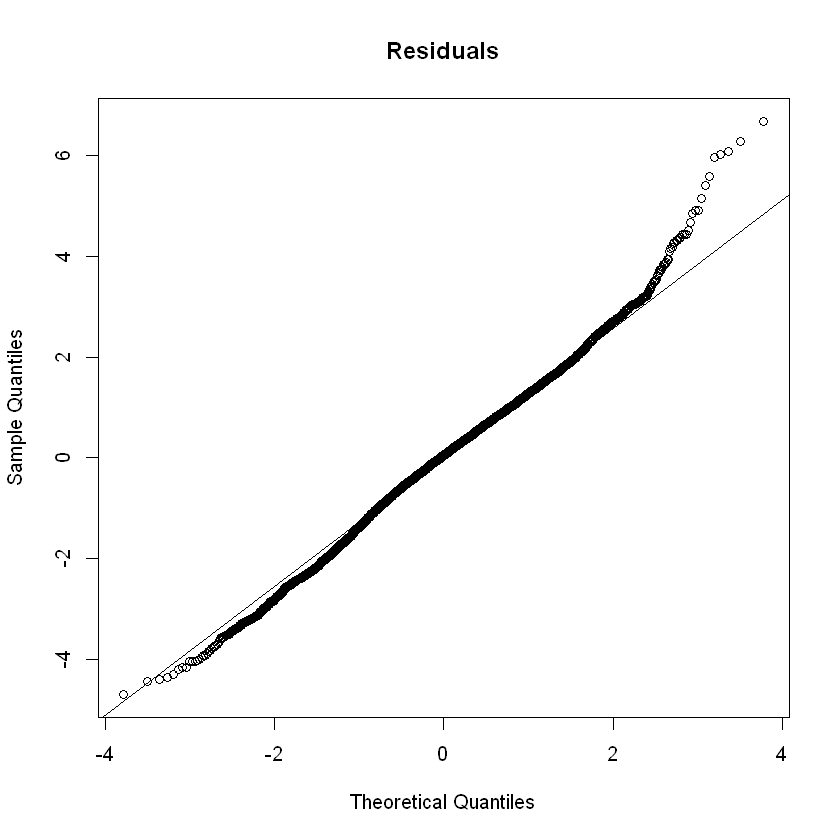

$`HenID:PenID`

$PenID


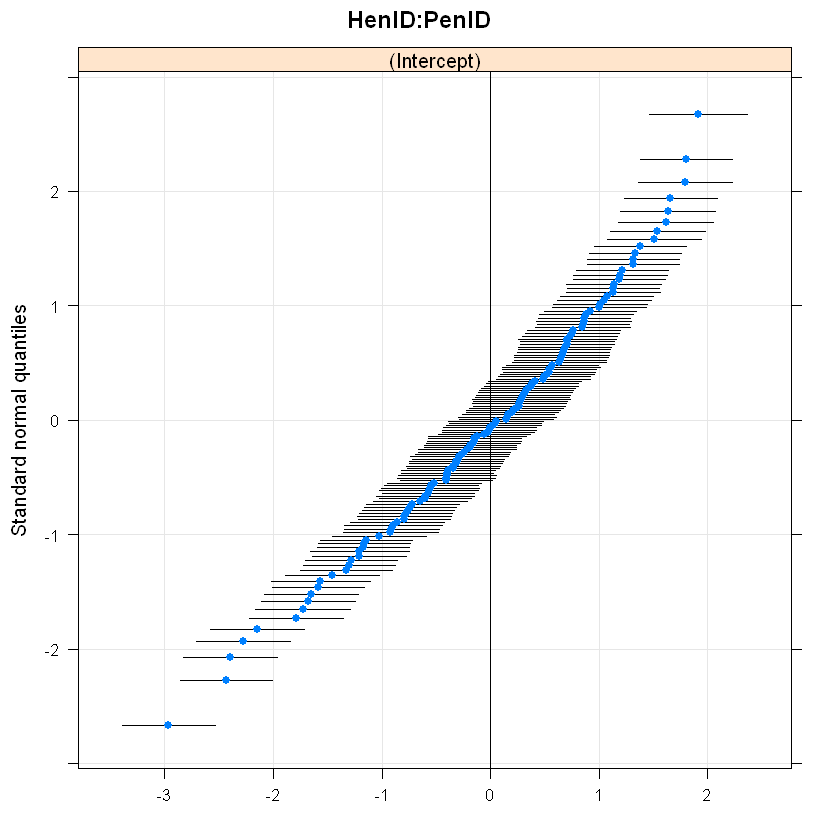

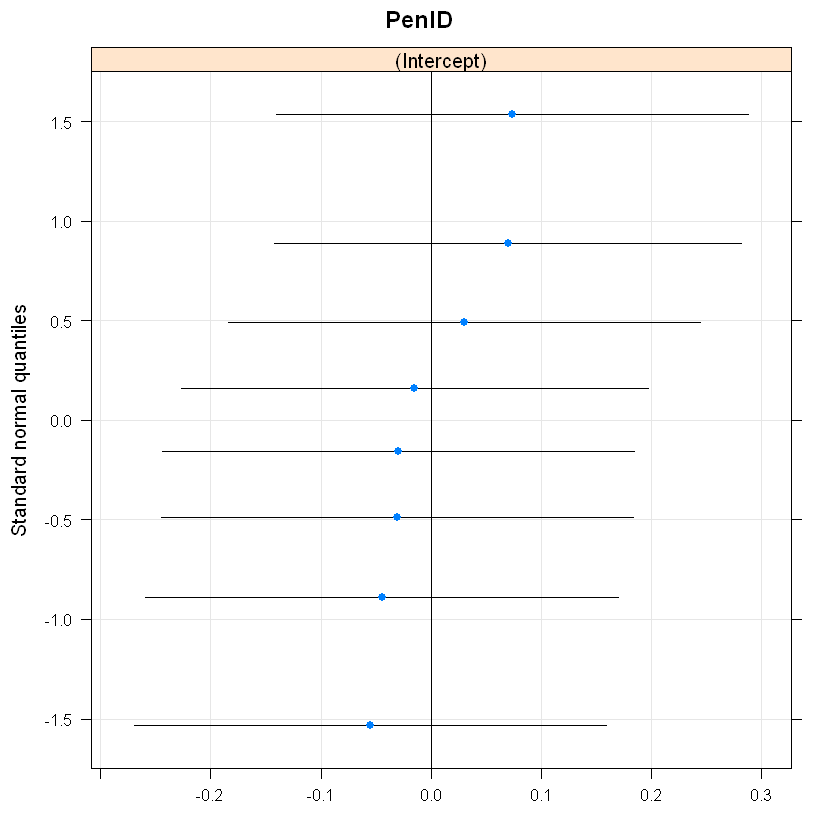

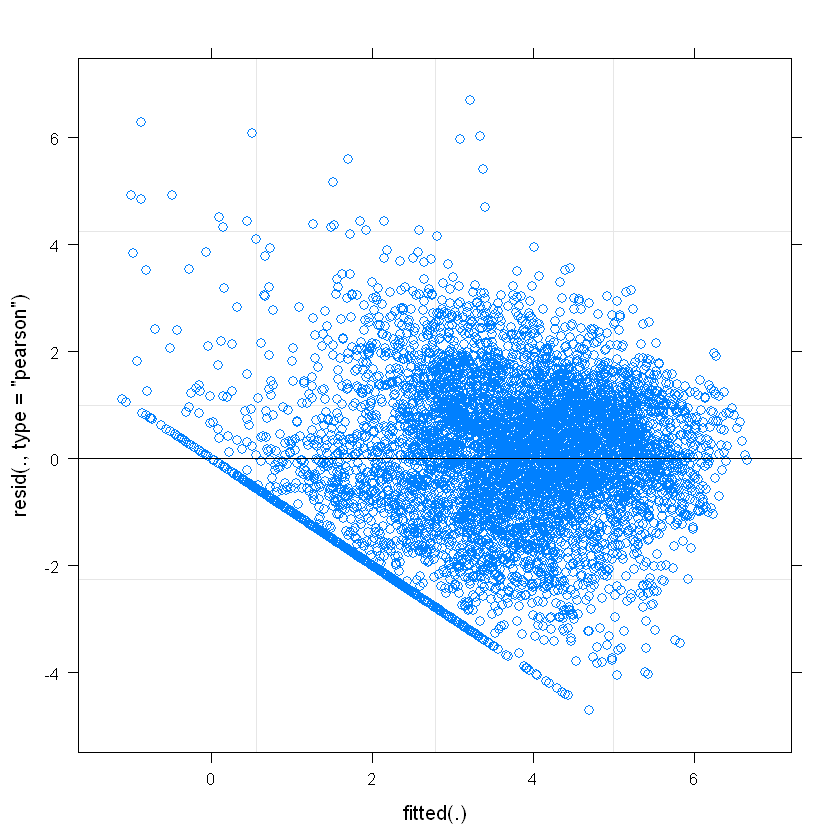

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

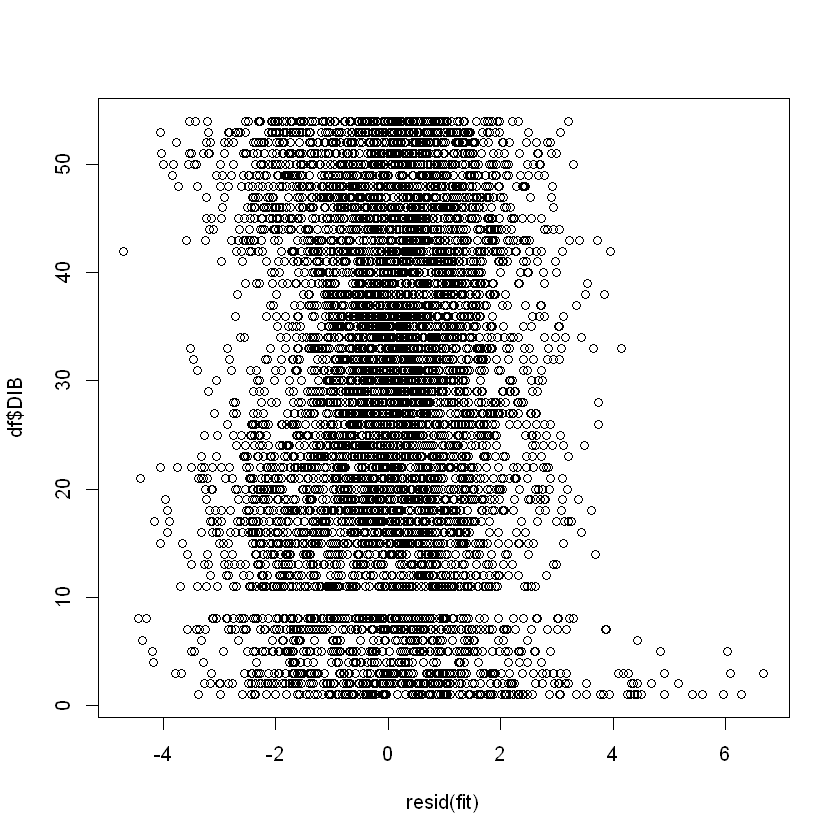

In [15]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','perc_duration_3_Zone')
sink(file.path(path__,paste(name,'.txt', sep='')))

#modeling
df$sqrtperc_duration_3_Zone = sqrt(df$perc_duration_3_Zone)
df$logperc_duration_3_Zone = log(df$perc_duration_3_Zone+1)
df$hoDIB = df$DIB**2
tail(df,3)
fit = lmerTest::lmer(sqrtperc_duration_3_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#################visualise plot
plot(resid(fit),df$sqrtperc_duration_3_Zone)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df$DIB)

#################saving plot
#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity',name,'.jpg', sep='')))
plot(resid(fit),df$sqrtperc_duration_3_Zone)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df$DIB)
dev.off()

# perc_duration_2_Zone

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,sqrtperc_duration_5_Zone,logperc_duration_5_Zone,hoDIB,sqrtperc_duration_4_Zone,logperc_duration_4_Zone,factDIB,sqrtperc_duration_3_Zone,logperc_duration_3_Zone,sqrtperc_duration_2_Zone,logperc_duration_2_Zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,6.946355,3.896947,2704,2.752776,2.149175,52,1.930745,1.553455,6.117825,3.648781
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,6.966587,3.902646,2809,2.189622,1.756900,53,1.636392,1.302309,6.606675,3.798813
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,6.710136,3.829205,2916,2.214013,1.775266,54,2.245984,1.799140,6.601066,3.797152


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrtperc_duration_2_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup +  
    (1 | PenID/HenID)
   Data: df

REML criterion at convergence: 26807

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4968 -0.5804  0.0529  0.6262  5.9827 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 1.79843  1.3411  
 PenID       (Intercept) 0.06908  0.2628  
 Residual                3.53055  1.8790  
Number of obs: 6429, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         4.701e+00  1.852e-01  1.436e+01   25.38 2.48e-13 ***
DIB                 2.596e-02  1.932e-03  6.296e+03   13.44  < 2e-16 ***
EarlyGroupNMVT     -2.879e+00  2.673e-01  1.680e+02  -10.77  < 2e-16 ***
DIB:EarlyGroupNMVT  5.153e-02  3.210e-03  6.296e+03   16.05  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,1.17877507,1.52837256
.sig02,0.00000000,0.63832807
.sigma,1.84633909,1.91197267
(Intercept),4.32345408,5.06218830
DIB,0.02217035,0.02974379
EarlyGroupNMVT,-3.43044796,-2.35931199
DIB:EarlyGroupNMVT,0.04523394,0.05781670


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-13403.48,26820.97,NA,NA,NA
(1 | HenID:PenID),6,-14459.32,28930.64,2111.6748967,1,0.0000000
(1 | PenID),6,-13403.88,26819.77,0.7972732,1,0.3719099


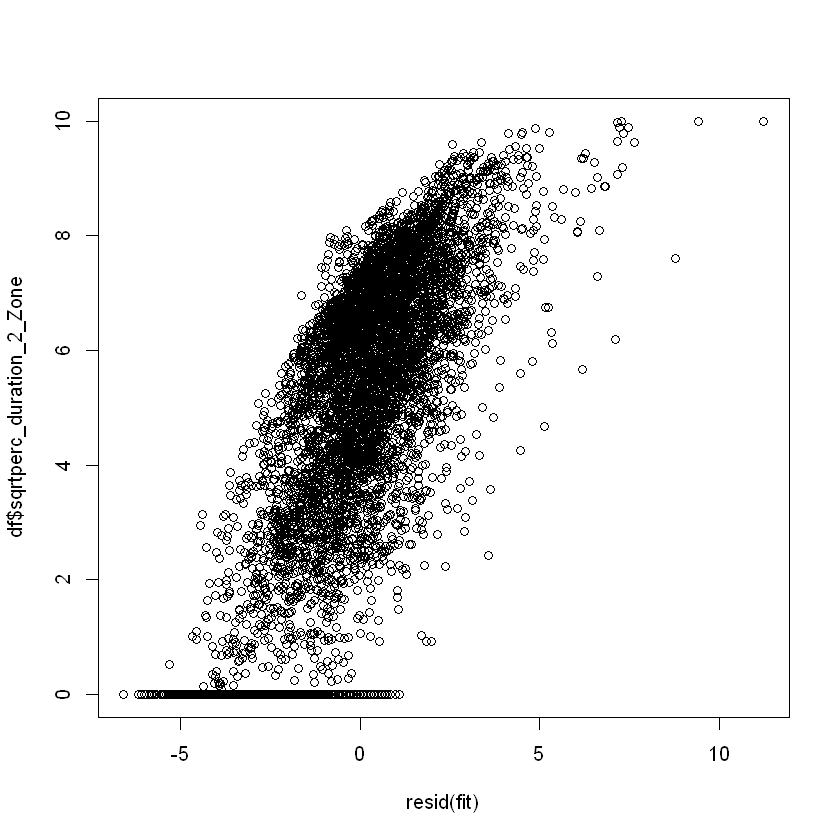

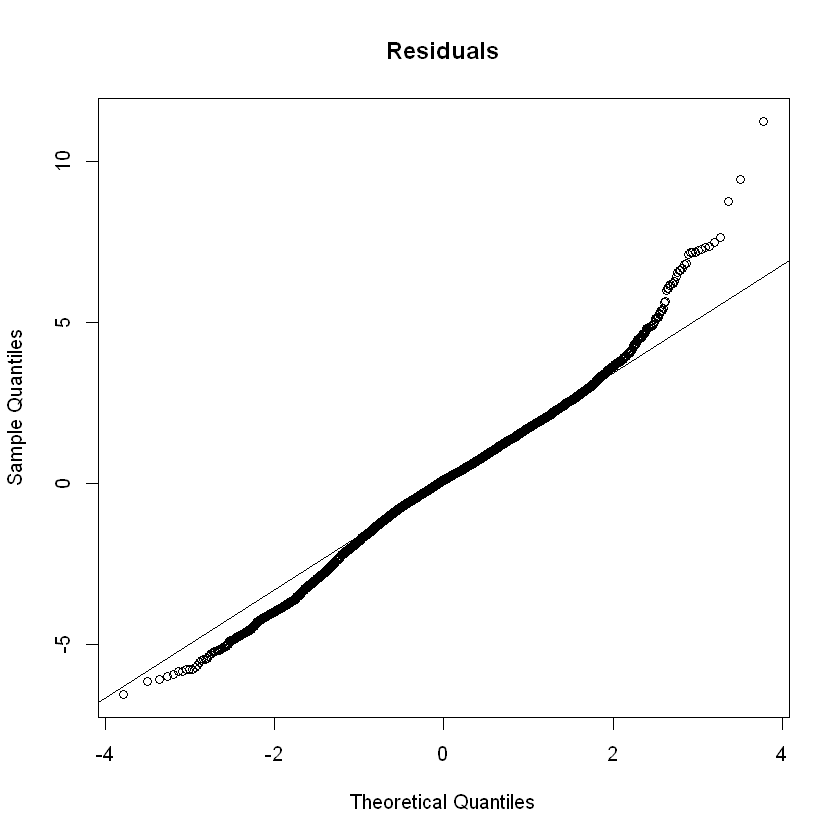

$`HenID:PenID`

$PenID


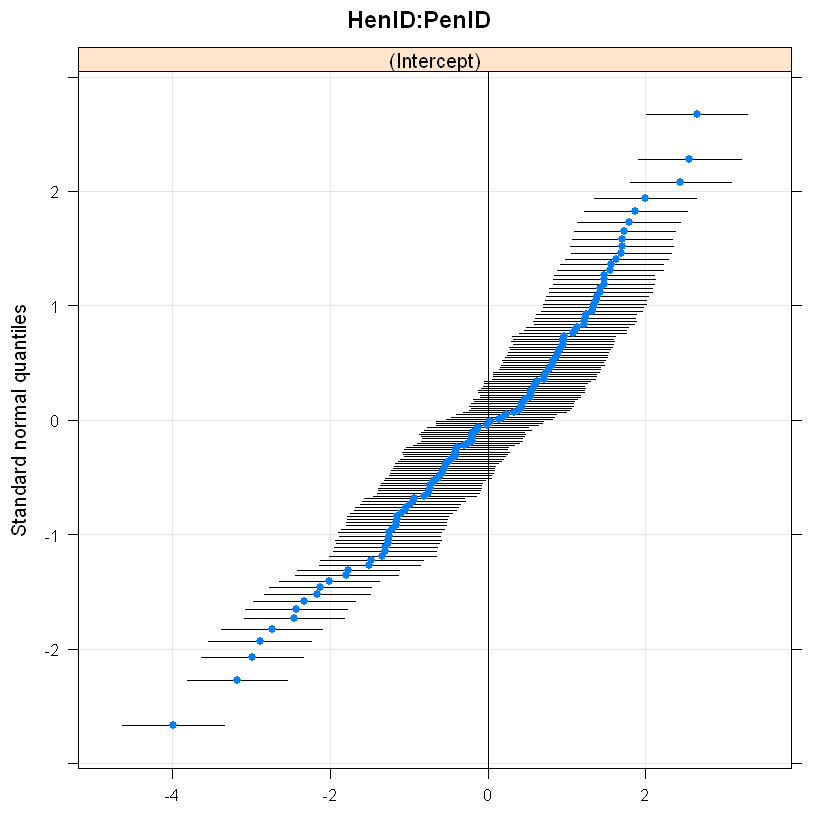

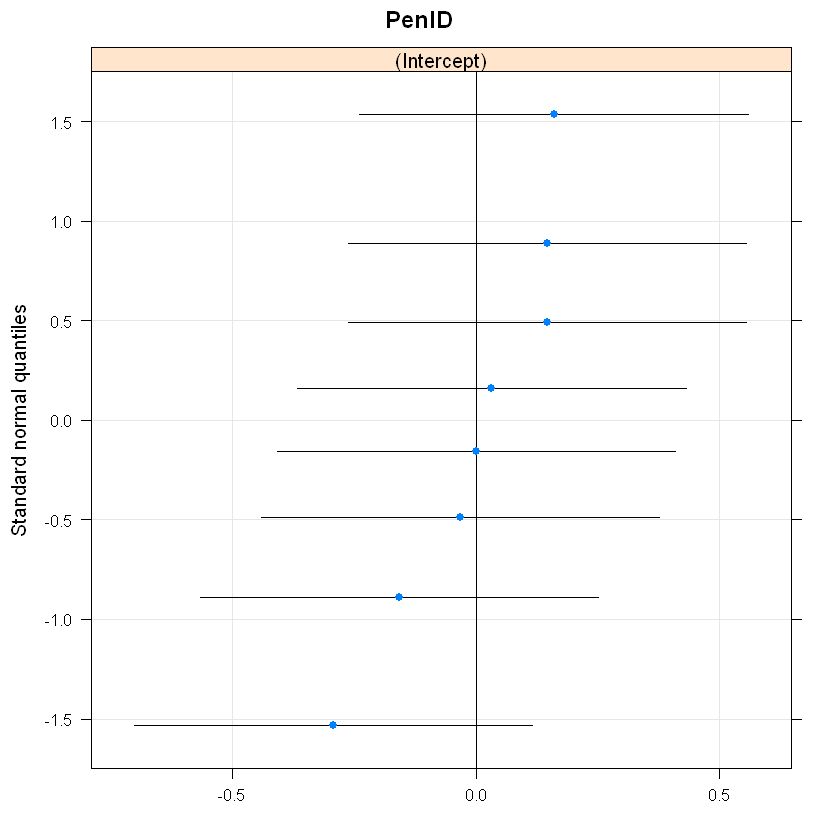

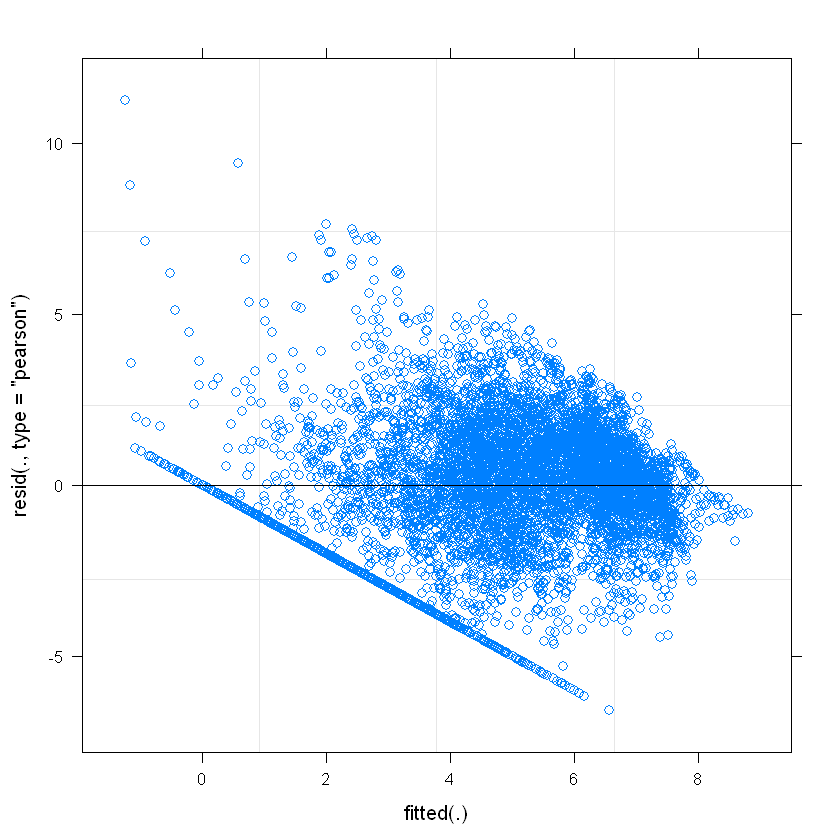

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

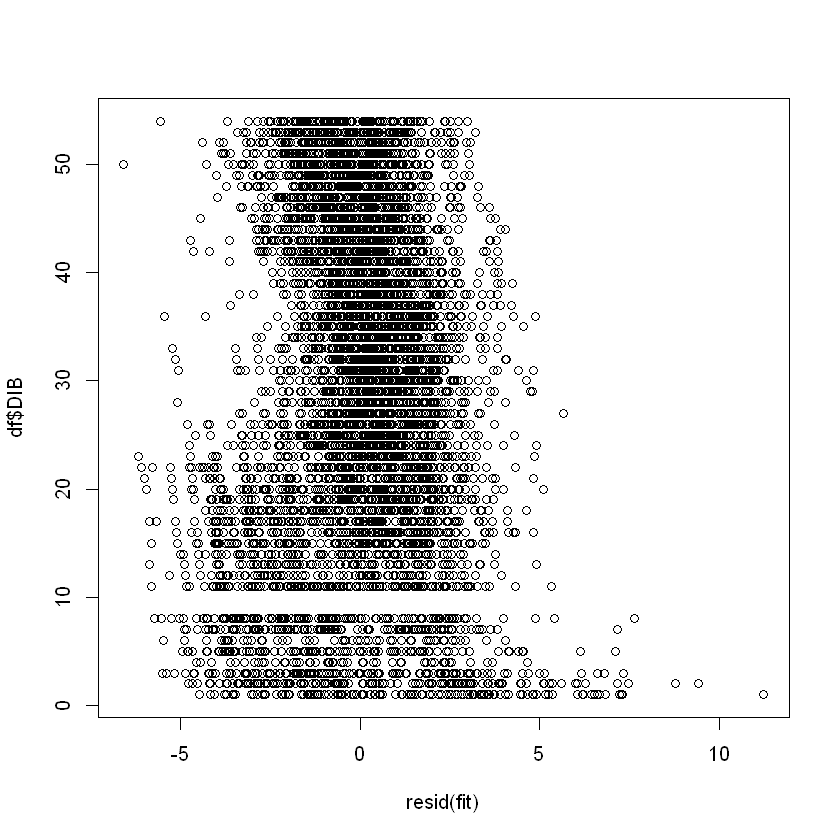

In [16]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','perc_duration_2_Zone')
sink(file.path(path__,paste(name,'.txt', sep='')))

#modeling
df$sqrtperc_duration_2_Zone = sqrt(df$perc_duration_2_Zone)
df$logperc_duration_2_Zone = log(df$perc_duration_2_Zone+1)
df$hoDIB = df$DIB**2
tail(df,3)
fit = lmerTest::lmer(sqrtperc_duration_2_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#################visualise plot
plot(resid(fit),df$sqrtperc_duration_2_Zone)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df$DIB)

#################saving plot
#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity',name,'.jpg', sep='')))
plot(resid(fit),df$sqrtperc_duration_2_Zone)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df$DIB)
dev.off()

# perc_duration_1_Zone

[1] 5570   33

 minutes.until.light.turn.off.after.first.moment.in.WG
 Min.   :  0.0                                        
 1st Qu.:  0.0                                        
 Median :180.5                                        
 Mean   :181.0                                        
 3rd Qu.:365.5                                        
 Max.   :418.3                                        
                                                      
 minutes.until.light.turn.off.after.first.moment.in.litter
 Min.   :  0.0                                            
 1st Qu.:569.7                                            
 Median :699.6                                            
 Mean   :628.2                                            
 3rd Qu.:802.2                                            
 Max.   :900.0                                            
                                                          
 minutes.until.light.turn.off.after.first.moment.in.lowerperch
 Min.   :  0.0           

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,hoDIB,sqrtperc_duration_4_Zone,logperc_duration_4_Zone,factDIB,sqrtperc_duration_3_Zone,logperc_duration_3_Zone,sqrtperc_duration_2_Zone,logperc_duration_2_Zone,sqrtperc_duration_1_Zone,logperc_duration_1_Zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,2704,2.752776,2.149175,52,1.930745,1.553455,6.117825,3.648781,1.7363222,1.3899912
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,2809,2.189622,1.756900,53,1.636392,1.302309,6.606675,3.798813,0.5884695,0.2973573
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,2916,2.214013,1.775266,54,2.245984,1.799140,6.601066,3.797152,1.2056964,0.8975986


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logperc_duration_1_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup +  
    (1 | PenID/HenID)
   Data: df_WG

REML criterion at convergence: 12721.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5330 -0.5890 -0.0997  0.6188  3.8254 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 0.4105   0.6407  
 PenID       (Intercept) 0.0000   0.0000  
 Residual                0.5262   0.7254  
Number of obs: 5570, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         7.743e-01  7.788e-02  1.883e+02   9.942  < 2e-16 ***
DIB                 5.011e-03  9.738e-04  5.437e+03   5.146 2.76e-07 ***
EarlyGroupNMVT     -4.349e-01  1.292e-01  1.883e+02  -3.367  0.00092 ***
DIB:EarlyGroupNMVT  7.283e-03  1.615e-03  5.437e+03   4.510 6.63e-06 ***
---
Signif. codes:  0 '***' 0.001 '

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.563785009,0.723311331
.sig02,0.000000000,0.173100080
.sigma,0.711845367,0.739112122
(Intercept),0.621846054,0.926695604
DIB,0.003102449,0.006919825
EarlyGroupNMVT,-0.687698001,-0.182106186
DIB:EarlyGroupNMVT,0.004117230,0.010447668


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-6360.702,12735.40,NA,NA,NA
(1 | HenID:PenID),6,-7684.457,15380.91,2.647511e+03,1,0.0000000
(1 | PenID),6,-6360.702,12733.40,5.456968e-12,1,0.9999981


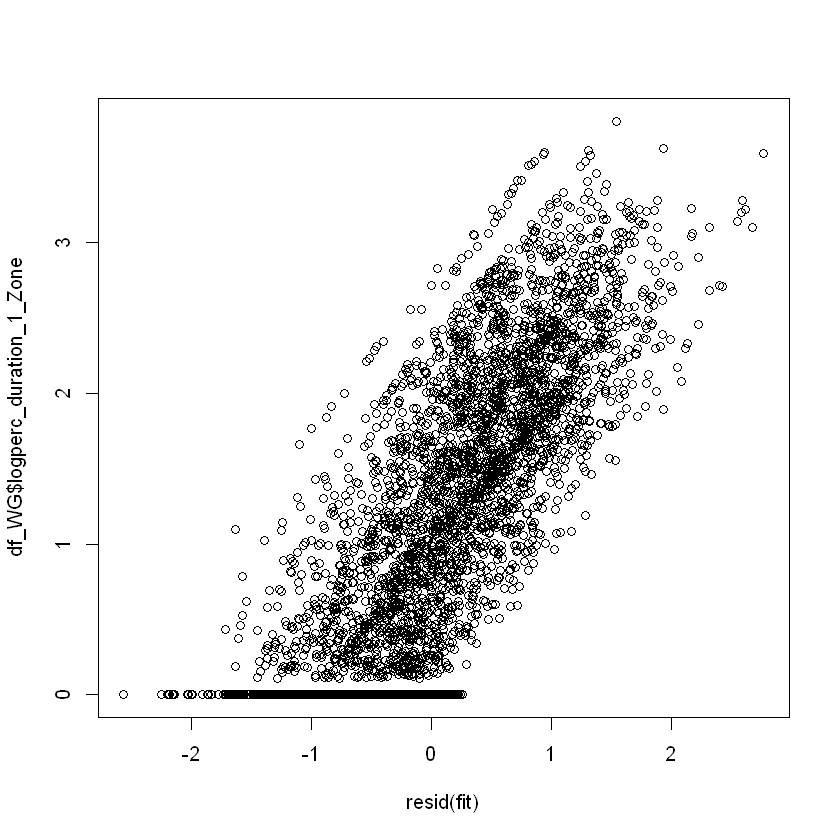

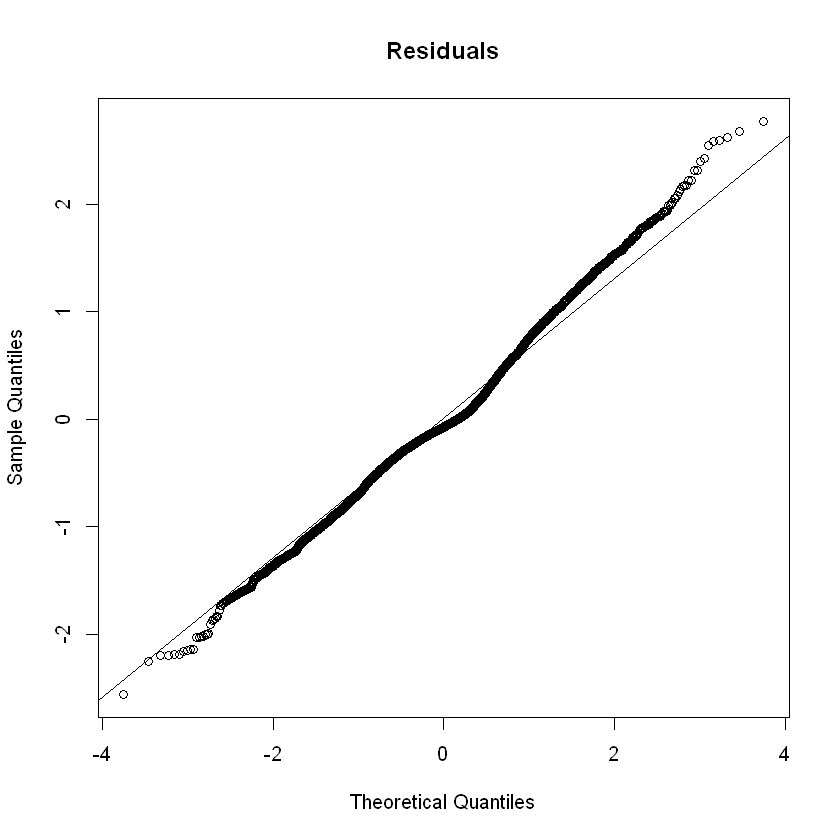

$`HenID:PenID`

$PenID


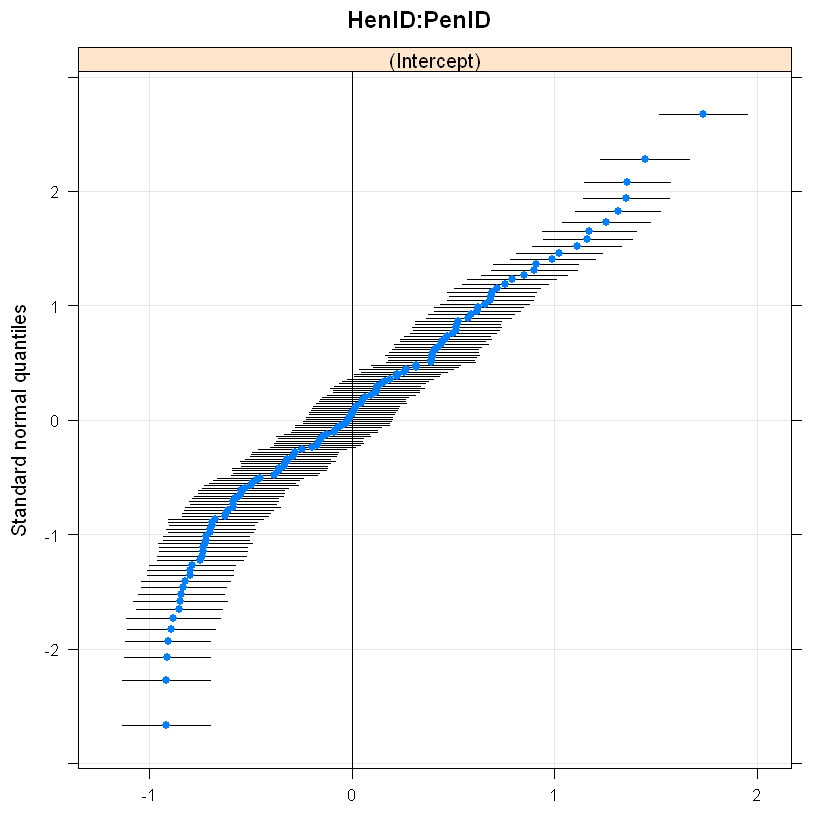

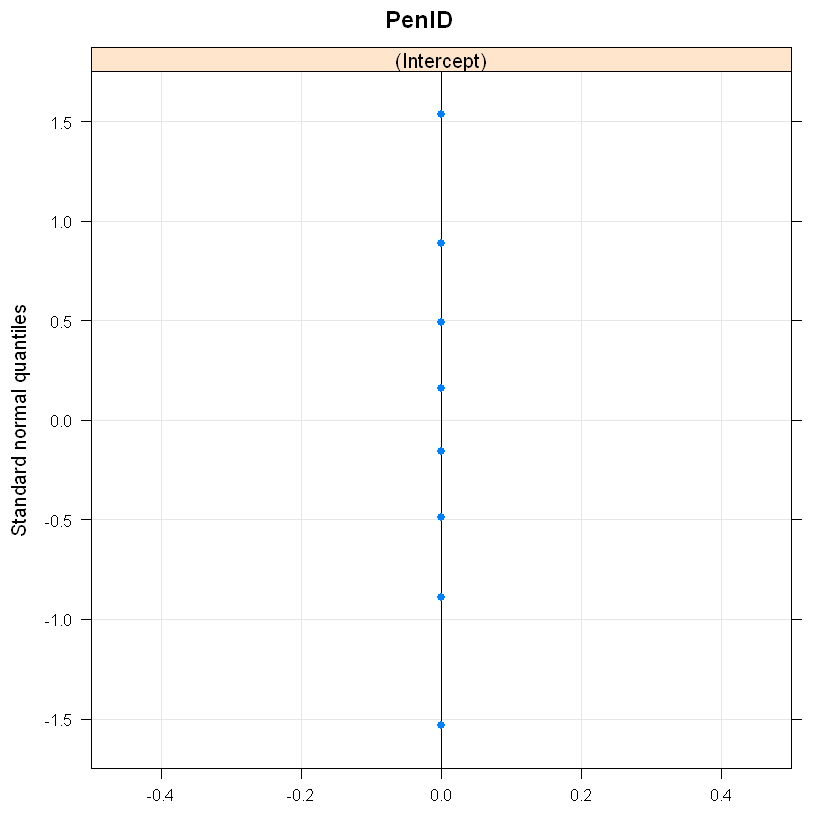

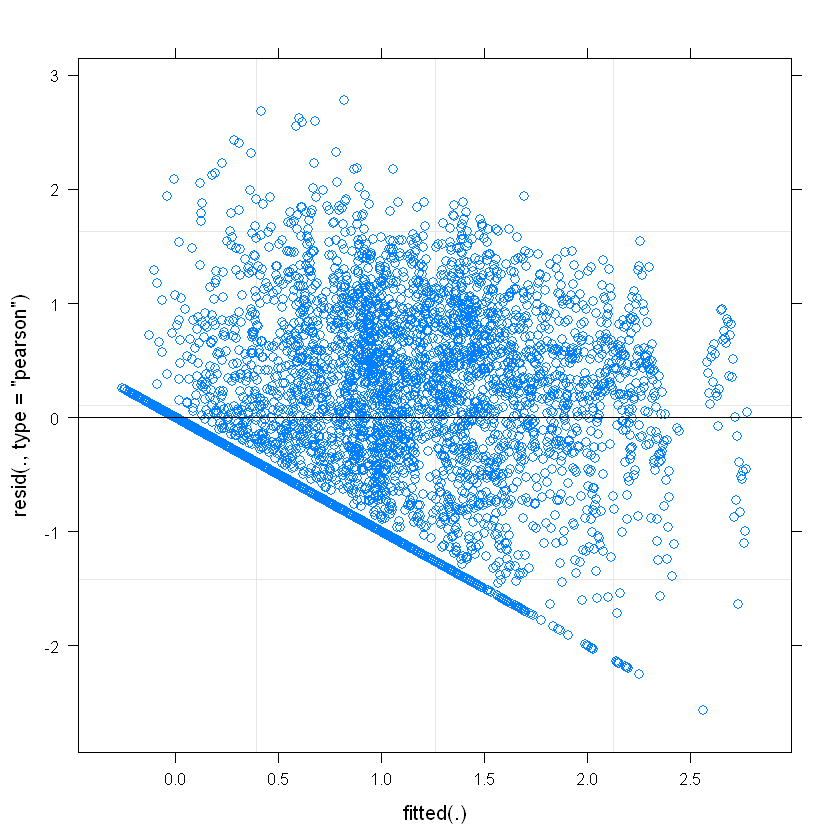

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

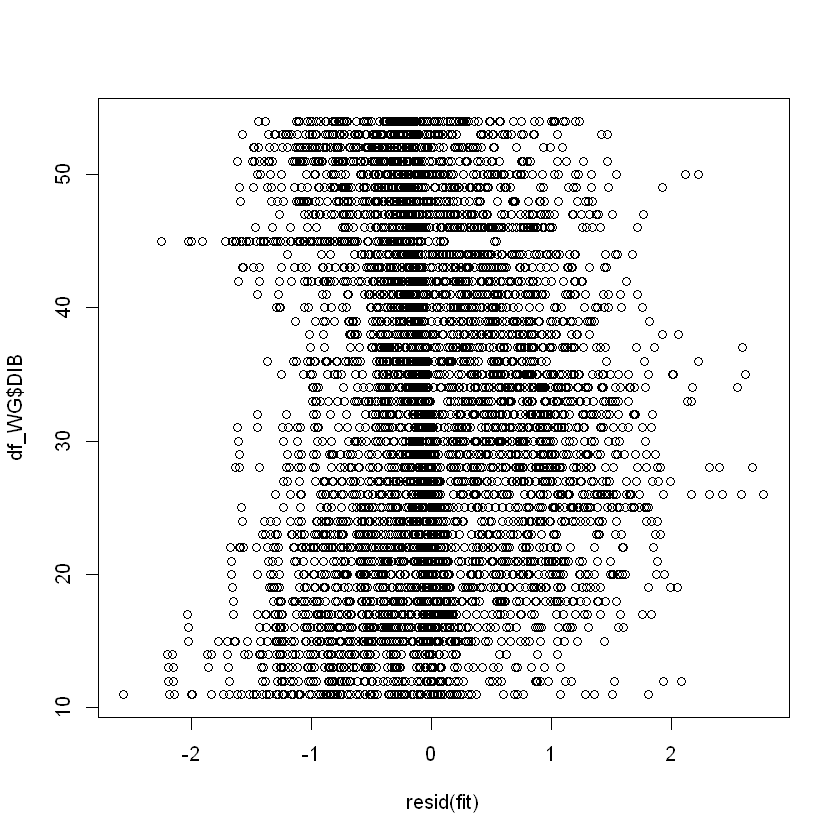

In [17]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','perc_duration_1_Zone')
sink(file.path(path__,paste(name,'.txt', sep='')))

#dataframe
df_WG = df[ which(df$DIB>=11), ]
df_WG$sqrtperc_duration_1_Zone = sqrt(df_WG$perc_duration_1_Zone)
df_WG$logperc_duration_1_Zone = log(df_WG$perc_duration_1_Zone+1)
df_WG$hoDIB = df_WG$DIB**2
dim(df_WG)
summary(df_WG)
tail(df_WG,3)

#nodelling
fit = lmerTest::lmer(logperc_duration_1_Zone ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df_WG)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#################visualise plot
plot(resid(fit),df_WG$logperc_duration_1_Zone)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df_WG$DIB)

#################saving plot
#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity',name,'.jpg', sep='')))
plot(resid(fit),df_WG$logperc_duration_1_Zone)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df_WG$DIB)
dev.off()

# minutes.until.light.turn.off.after.first.moment.in.litter

In [ ]:
#try arcsin transformation!

,minutes.until.light.turn.off.after.first.moment.in.WG,minutes.until.light.turn.off.after.first.moment.in.litter,minutes.until.light.turn.off.after.first.moment.in.lowerperch,minutes.until.light.turn.off.after.first.moment.in.nestboxzone,minutes.until.light.turn.off.after.first.moment.in.top.floor,minutes.until.light.turn.off.after.first.transition.longer.than.15mn.to.nestboxzone,max_duration,vertical_travel_distance,Max_duration_WG,nbr_stays_1_Zone,...,hoDIB,sqrtperc_duration_4_Zone,logperc_duration_4_Zone,factDIB,sqrtperc_duration_3_Zone,logperc_duration_3_Zone,sqrtperc_duration_2_Zone,logperc_duration_2_Zone,sqrtminutes.until.light.turn.off.after.first.moment.in.litter,logminutes.until.light.turn.off.after.first.moment.in.litter
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6427,210.0333,892.6667,894.9500,900.0000,872.95,771.2833,7443,66,1011,3,...,2704,2.752776,2.149175,52,1.930745,1.553455,6.117825,3.648781,29.87753,6.795333
6428,146.5500,894.2667,894.9667,900.0000,842.30,750.3333,5518,69,187,1,...,2809,2.189622,1.756900,53,1.636392,1.302309,6.606675,3.798813,29.90429,6.797122
6429,287.5000,893.2000,893.5667,839.4167,900.00,742.4500,6969,78,457,3,...,2916,2.214013,1.775266,54,2.245984,1.799140,6.601066,3.797152,29.88645,6.795929


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: minutes.until.light.turn.off.after.first.moment.in.litter ~ DIB +  
    EarlyGroup + DIB:EarlyGroup + (1 | PenID/HenID)
   Data: df

REML criterion at convergence: 84518.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2557 -0.3230  0.1520  0.5458  4.4601 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 11291.4  106.26  
 PenID       (Intercept)   639.8   25.29  
 Residual                28233.1  168.03  
Number of obs: 6429, groups:  HenID:PenID, 132; PenID, 8

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         344.5717    15.7623   14.1055   21.86 2.79e-12 ***
DIB                   9.6702     0.1728 6295.7905   55.97  < 2e-16 ***
EarlyGroupNMVT     -223.3920    21.6777  177.9287  -10.30  < 2e-16 ***
DIB:EarlyGroupNMVT    3.7895     0.2870 6295.8878   13.20  < 2e-16 ***
---
Signif. co

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,93.254671,121.239902
.sig02,0.000000,55.968505
.sigma,165.108417,170.977657
(Intercept),312.583747,375.459610
DIB,9.331472,10.008721
EarlyGroupNMVT,-267.571769,-181.307735
DIB:EarlyGroupNMVT,3.226866,4.352069


Computing profile confidence intervals ...



,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,-42259.08,84532.17,NA,NA,NA
(1 | HenID:PenID),6,-43100.12,86212.24,1682.073209,1,0.0000000
(1 | PenID),6,-42259.86,84531.73,1.557364,1,0.2120516


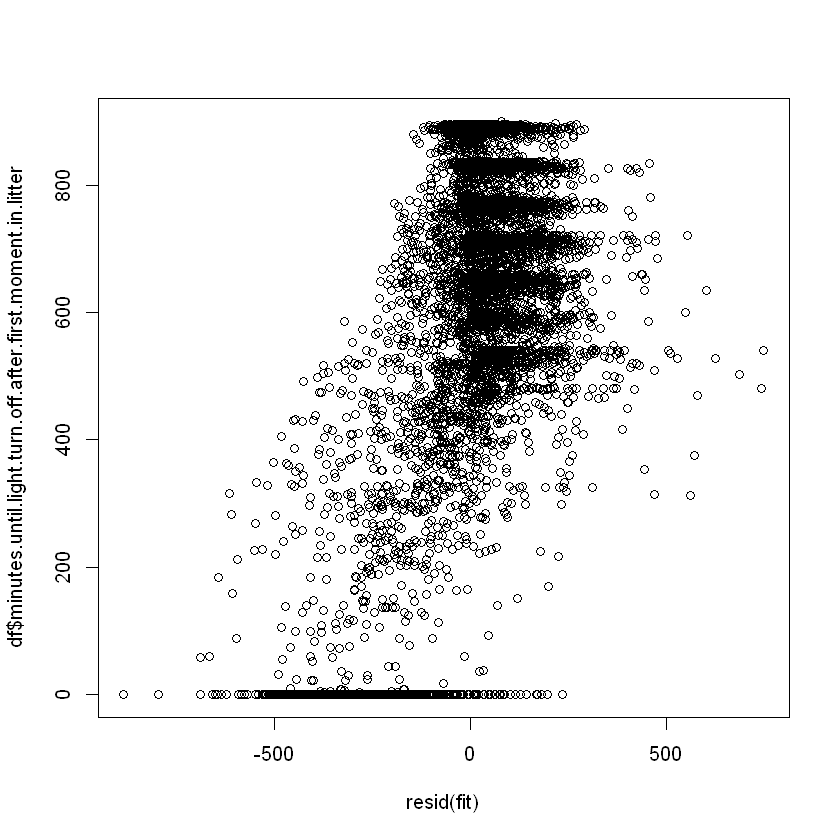

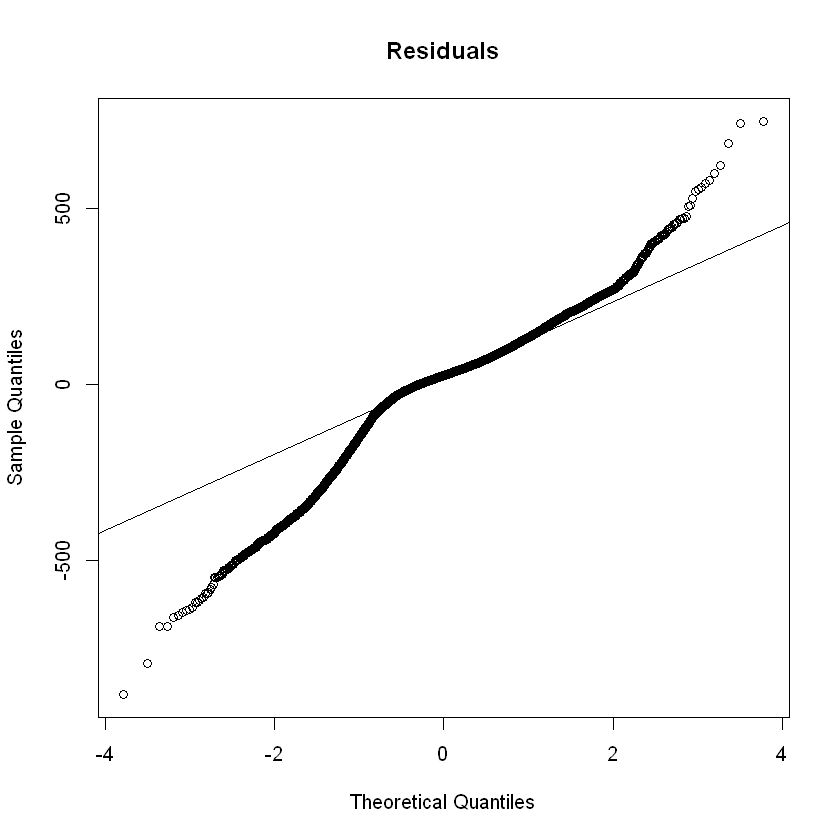

$`HenID:PenID`

$PenID


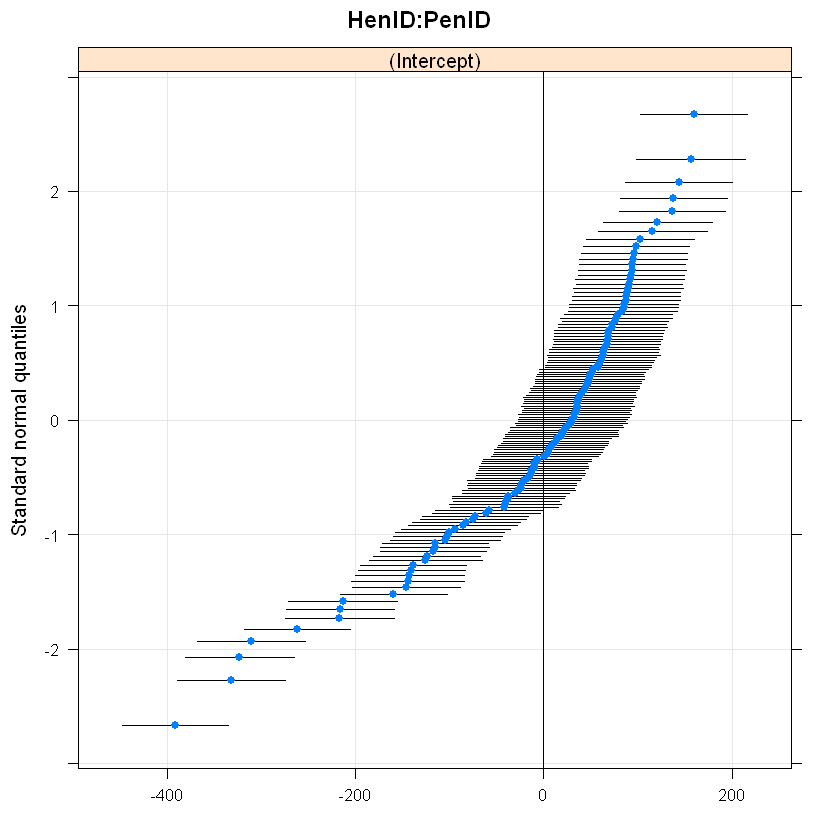

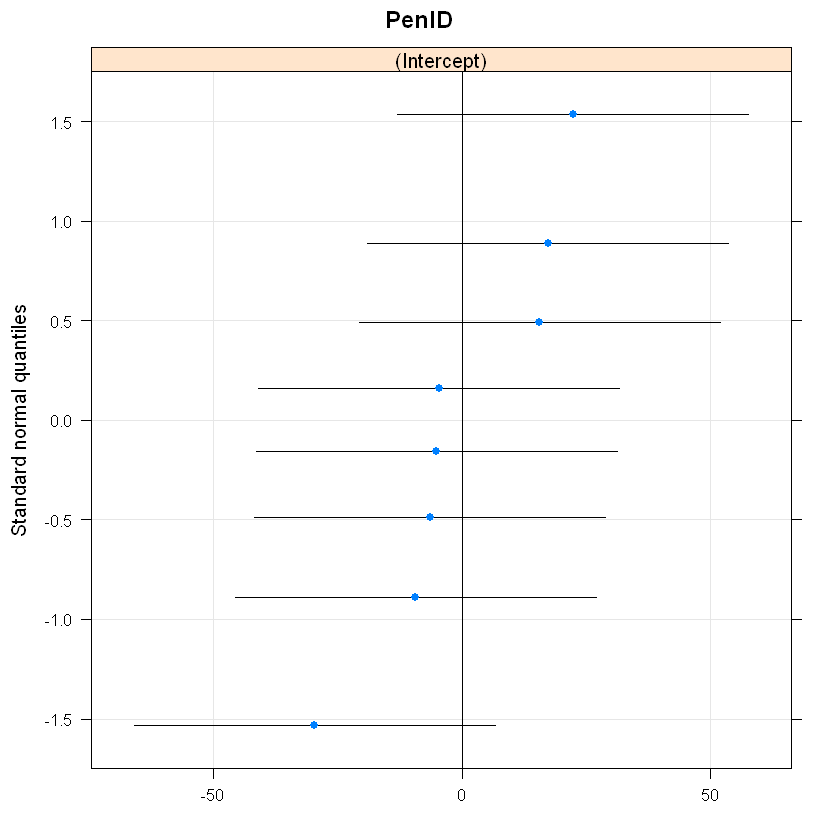

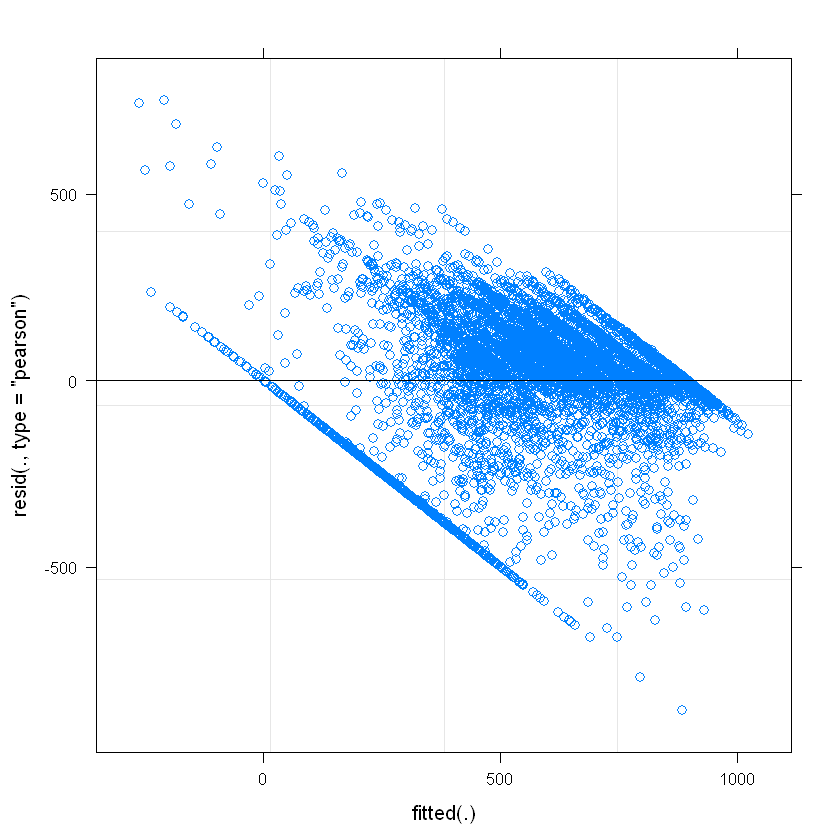

Warning message in jpeg(file.path(path__, paste("diagnostic_predictors_linearity_5_Zone", :
"impossible d'ouvrir le fichier 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/correctlightschedule_/visual/Treatment&Classs/adaptability/MVTCLUSTERING/modelling/minutes.until.light.turn.off.after.first.moment.in.litter/diagnostic_predictors_linearity_5_ZoneFirstModel.jpg' pour écriture"
Warning message in jpeg(file.path(path__, paste("diagnostic_predictors_linearity_5_Zone", :
"opening device failed"


ERROR: Error in jpeg(file.path(path__, paste("diagnostic_predictors_linearity_5_Zone", : impossible de démarrer le périphérique jpeg()


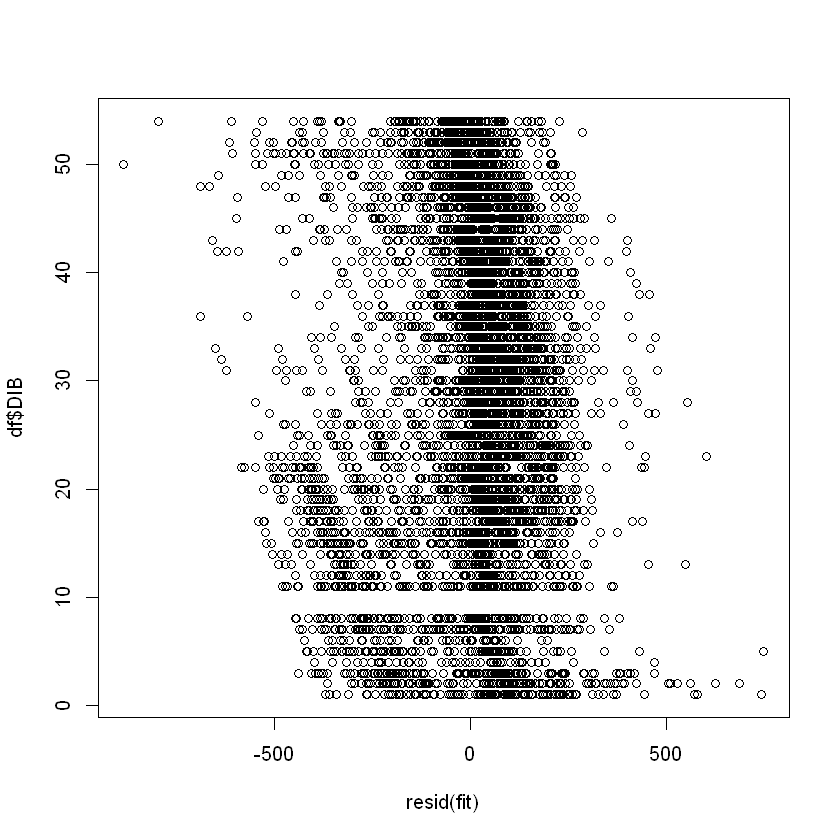

In [18]:
#initialise file to save inforamtion for Mike
path__ = file.path(path_,'modelling','minutes.until.light.turn.off.after.first.moment.in.litter')
sink(file.path(path__,paste(name,'.txt', sep='')))

#modeling
df$sqrtminutes.until.light.turn.off.after.first.moment.in.litter = sqrt(df$minutes.until.light.turn.off.after.first.moment.in.litter)
df$logminutes.until.light.turn.off.after.first.moment.in.litter = log(df$minutes.until.light.turn.off.after.first.moment.in.litter+1)
df$hoDIB = df$DIB**2
tail(df,3)
fit = lmerTest::lmer(minutes.until.light.turn.off.after.first.moment.in.litter ~ DIB + EarlyGroup + DIB:EarlyGroup + (1|PenID/HenID), data=df)
#capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
cat('----------------- MODEL SUMMARY', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(summary(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
confint(fit)
cat('----------------- CONFIDENCE INTERVALS OF ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(confint(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
rand(fit)
cat('----------------- RANDOM EFFECTS ESTIMATES', file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)
capture.output(rand(fit), file=file.path(path__,paste(name,'.txt', sep='')), append=TRUE)

#################visualise plot
plot(resid(fit),df$minutes.until.light.turn.off.after.first.moment.in.litter)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
qqmath(ranef(fit,condVar = TRUE))
plot(fit)
plot(resid(fit),df$DIB)

#################saving plot
#Assumptions
######linearity of predictors: plot residual vs observed
jpeg(file.path(path__, paste('diagnostic_predictors_linearity_5_Zone',name,'.jpg', sep='')))
plot(resid(fit),df$minutes.until.light.turn.off.after.first.moment.in.litter)
dev.off()

###### normally distributed residuals
#qqmath(fit, id=0.05)
jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

jpeg(file.path(path__, paste('diagnostic_normally_distributed_residual_histograam',name,'.jpg', sep='')))
hist(resid(fit))
dev.off()

###### normally of random effects
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_henPen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'HenID:PenID'
dev.off()
jpeg(file.path(path__, paste('diagnostic_normally_distributed_randomeffect_pen',name,'.jpg', sep='')))
qqmath(ranef(fit,condVar = TRUE))$'PenID'
dev.off()

######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path__, paste('diagnostic_homogeneity_variance',name,'.jpg', sep='')))
plot(fit)
dev.off()

###### check if the residuals are independent. This can be checked by plotting residuals against covariates - especially time-varying or spatial covariates. There should not be any systematic pattern
jpeg(file.path(path__, paste('diagnostic_independance_of_resodials',name,'.jpg', sep='')))
plot(resid(fit), df$DIB)
dev.off()